<a href="https://colab.research.google.com/github/Anwesha-dash811/Datavisulalization/blob/main/datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title - Indian food analysis

TODO - In this dataset,the famous indian foods along with their ingrdients,cooking time,region are mentioned and in this project we are going to visualize the indian food items on the basis of flavour,diet,preparation time and cooking time.We will also find the common ingredients in some region

## Downloading the Dataset

**Downloaded the indian food datset from kaggle for data visualization**

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
!pip install numpy pandas matplotlib seaborn --upgrade --quiet

In [ ]:
dataset_url = 'https://www.kaggle.com/nehaprabhavalkar/indian-food-101' 


In [ ]:
import opendatasets as od
od.download(dataset_url)

0it [00:00, ?it/s]

Kaggle dataset ID:  nehaprabhavalkar/indian-food-101


8192it [00:00, 32494.92it/s]            

Extracting archive ./indian-food-101.zip to ./indian-food-101


In [ ]:
data_dir = './indian-food-101'

In [ ]:
import os
os.listdir(data_dir)

['indian_food.csv']

## Data Preparation and Cleaning

**The data in the dataset is cleaned for further execution.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
food_df = pd.read_csv('indian_food.csv')

In [ ]:
food_df 

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [ ]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
food_df.shape

(255, 9)

In [ ]:
#Finding the columns of food dataframe
food_df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [ ]:
food_df.name.unique()

array(['Balu shahi', 'Boondi', 'Gajar ka halwa', 'Ghevar', 'Gulab jamun',
       'Imarti', 'Jalebi', 'Kaju katli', 'Kalakand', 'Kheer', 'Laddu',
       'Lassi', 'Nankhatai', 'Petha', 'Phirni', 'Rabri', 'Sheera',
       'Singori', 'Sohan halwa', 'Sohan papdi', 'Chhena jalebi',
       'Chhena kheeri', 'Chhena poda', 'Cham cham', 'Kheer sagar',
       'Ledikeni', 'Lyangcha', 'Malapua', 'Mihidana', 'Misti doi',
       'Pantua', 'Pithe', 'Rasabali', 'Ras malai', 'Rasgulla', 'Sandesh',
       'Adhirasam', 'Ariselu', 'Bandar laddu', 'Chikki', 'Dharwad pedha',
       'Double ka meetha', 'Gavvalu', 'Kakinada khaja', 'Kuzhi paniyaram',
       'Mysore pak', 'Obbattu holige', 'Palathalikalu', 'Poornalu',
       'Pongal', 'Pootharekulu', 'Qubani ka meetha', 'Sheer korma',
       'Unni Appam', 'Kajjikaya', 'Anarsa', 'Basundi', 'Dhondas',
       'Doodhpak', 'Mahim halwa', 'Modak', 'Shankarpali', 'Shrikhand',
       'Sutar feni', 'Maach Jhol', 'Pork Bharta', 'Chak Hao Kheer',
       'Galho', 'Aloo gob

In [ ]:
food_df[food_df.region.isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [ ]:
food_df.loc[[110],'region'] = 'North'


In [ ]:
food_df.loc[[110]]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,North


In [ ]:
food_df[food_df.diet != 'vegetarian']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
64,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South
76,Butter chicken,"Chicken, greek yogurt, cream, garam masala pow...",non vegetarian,10,35,spicy,main course,NCT of Delhi,North
79,Chicken razala,"Chicken, dahi, sesame seeds, garam masala powd...",non vegetarian,10,35,spicy,main course,West Bengal,East
80,Chicken Tikka masala,"Naan bread, tomato sauce, skinless chicken bre...",non vegetarian,10,50,spicy,main course,Punjab,North
81,Chicken Tikka,"Chicken, whole wheat bread, rice flour, garam ...",non vegetarian,120,45,spicy,starter,Punjab,North
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240,30,spicy,main course,Punjab,North
123,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt,...",non vegetarian,240,30,spicy,starter,Punjab,North


## Exploratory Analysis and Visualization

- visualization of vegeterian dishes and non vegeterian dishes in the dataset using bargraph
- visualization of the states in ascending order on the basis of the highest number of food items using scatterplot
- visualization of top 10 vegeterian and non-vegeterian food items using bargraph
- visualization of number of dishes based on regions using bargraph
- visualization of number of dishes based on courses



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 7.5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style("darkgrid")



In [ ]:
food_df.name.count()

255

In [ ]:
print(food_df.flavor_profile.unique())

['sweet' 'spicy' 'bitter' '-1' 'sour']


In [ ]:
food_df.flavor_profile.replace({'-1' : 'tasteless'},inplace=True)
food_df.flavor_profile.unique()

array(['sweet', 'spicy', 'bitter', 'tasteless', 'sour'], dtype=object)

In [ ]:
print('{} different flavours used in india'.format(food_df.flavor_profile.unique().shape[0]))

5 different flavours used in india


In [ ]:
region_df = food_df.groupby('region')[['name']].count()

In [ ]:
region_df

,name
region,
-1,13
Central,3
East,31
North,50
North East,25
South,59
West,74


In [ ]:
food_df.region.replace({'-1' : 'Not known'},inplace=True)
food_df.region.unique()

array(['East', 'West', 'North', 'Not known', 'North East', 'South',
       'Central'], dtype=object)

In [ ]:
food_df.state.replace({'-1' : 'Not known state'},inplace=True)
food_df.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh',
       'Not known state', 'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam',
       'Bihar', 'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala',
       'Tamil Nadu', 'Gujarat', 'Tripura', 'Manipur', 'Nagaland',
       'NCT of Delhi', 'Jammu & Kashmir', 'Chhattisgarh', 'Haryana',
       'Madhya Pradesh', 'Goa'], dtype=object)

In [ ]:
region_df = food_df.groupby('state')[['name']].count()
region_df

,name
state,
Andhra Pradesh,10
Assam,21
Bihar,3
Chhattisgarh,1
Goa,3
Gujarat,35
Haryana,1
Jammu & Kashmir,2
Karnataka,6


In [ ]:
## finding the number of vegeterian dishes and non vegeterian dishes in the dataset
##value_counts() return a Series containing counts of unique values.

food_df['diet'].value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

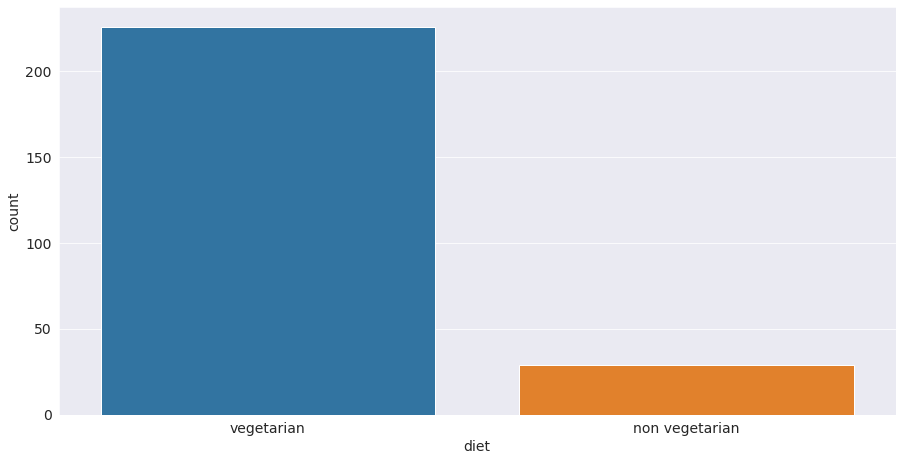

In [ ]:
## Visual representation of the content

sns.countplot(x='diet', data=food_df);

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [ ]:
##finding the states with most content, we use groupby() ,count() and sort_values() to get the result
topcontent_states = food_df.groupby('state').count().sort_values('diet',ascending=False)

topcontent_states.reset_index(inplace=True)

topcontent_states

,state,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,region
0,Gujarat,35,35,35,35,35,35,35,35
1,Punjab,32,32,32,32,32,32,32,32
2,Maharashtra,30,30,30,30,30,30,30,30
3,West Bengal,24,24,24,24,24,24,24,24
4,Not known state,24,24,24,24,24,24,24,24
5,Assam,21,21,21,21,21,21,21,21
6,Tamil Nadu,20,20,20,20,20,20,20,20
7,Andhra Pradesh,10,10,10,10,10,10,10,10
8,Uttar Pradesh,9,9,9,9,9,9,9,9
9,Kerala,8,8,8,8,8,8,8,8


/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


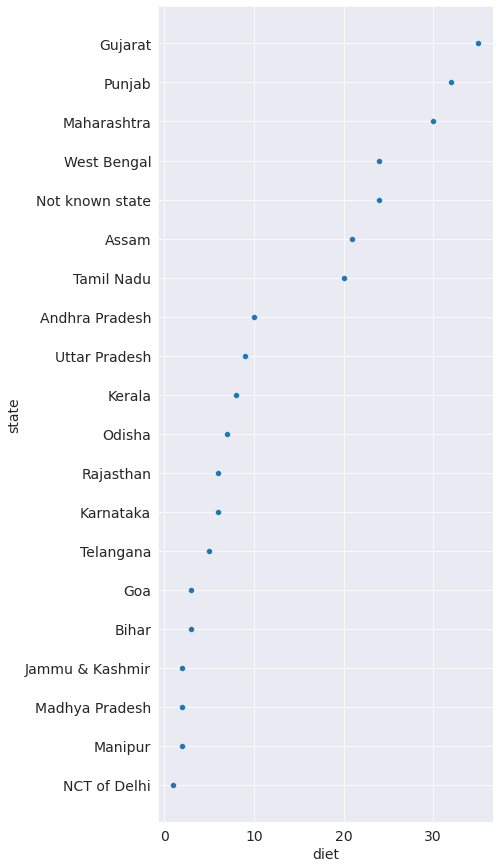

In [ ]:
#Visualize the information using scatterplot
plt.figure(figsize=(6, 15))

sns.scatterplot(topcontent_states.diet,topcontent_states.state.head(20));

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [ ]:
#top 10 states with highest number of famous food items
top_name=food_df["state"].value_counts()
top_name.head(10)

Gujarat            35
Punjab             32
Maharashtra        30
Not known state    24
West Bengal        24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Name: state, dtype: int64

Text(0.5, 1.0, 'Top 10 states with highest vegeterian dishes')

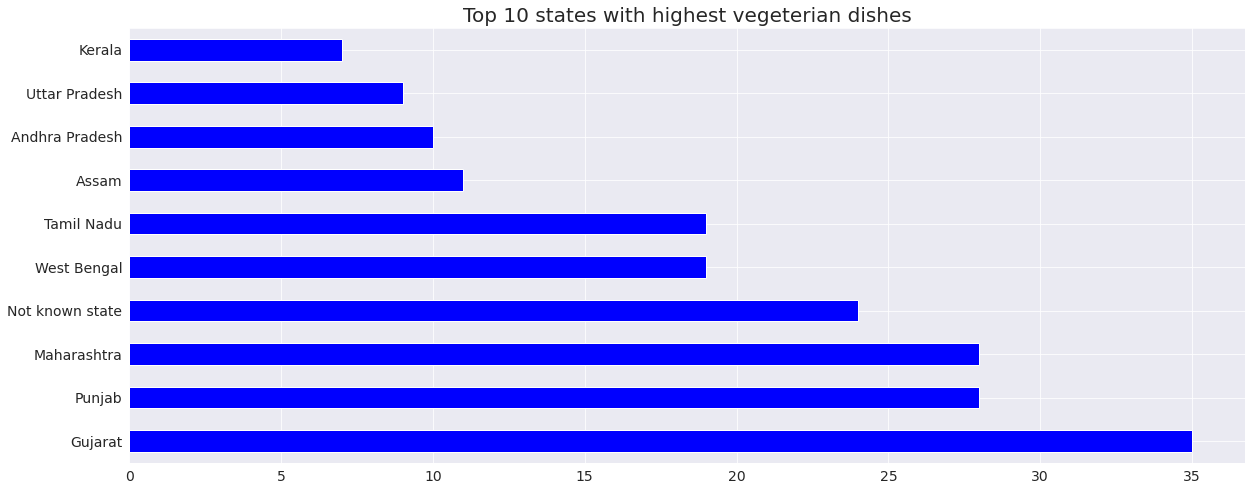

In [ ]:
plt.figure(figsize=(20,8))
food_df[food_df["diet"]=="vegetarian"]["state"].value_counts()[:10].plot(kind="barh",color="blue")
plt.title("Top 10 states with highest vegeterian dishes",size=20)

Text(0.5, 1.0, 'Top 10 states with highest non-vegeterian dishes')

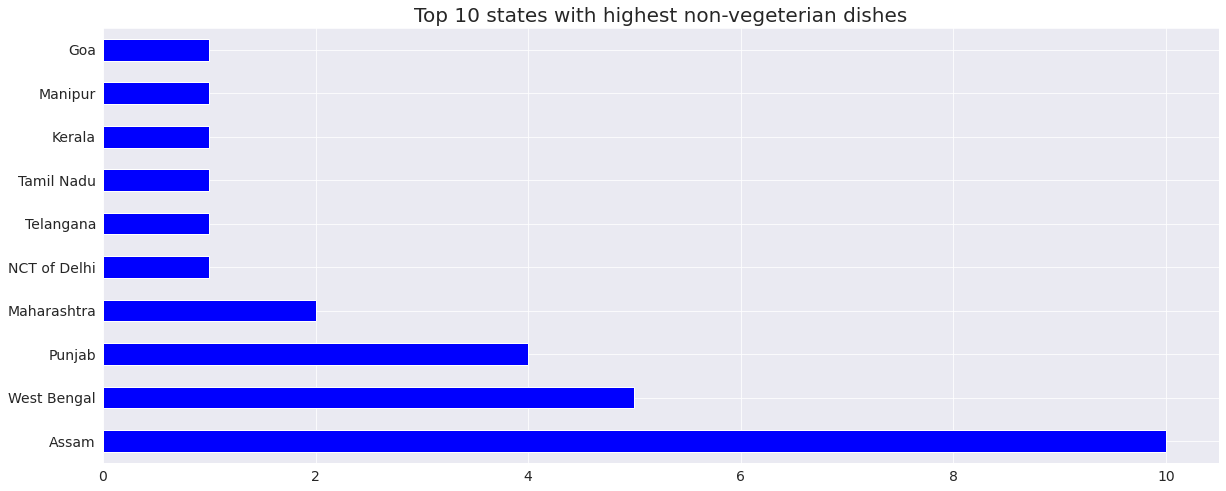

In [ ]:
plt.figure(figsize=(20,8))
food_df[food_df["diet"]=="non vegetarian"]["state"].value_counts()[:10].plot(kind="barh",color="blue")
plt.title("Top 10 states with highest non-vegeterian dishes",size=20)

In [ ]:
!pip install geopandas

In [ ]:
!pip install plotly

In [ ]:
!pip install cufflinks

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()


In [ ]:
reg_df = food_df.region.value_counts().reset_index()
reg_df.columns = ['region','count']
reg_df = reg_df.sample(frac=1)
fig = px.bar(reg_df,x='region',y='count',title='Number of dishes based on regions',
             color_discrete_sequence=['#316394'])
fig.show()

In [ ]:
course_df = food_df.course.value_counts().reset_index()
course_df.columns = ['course','count']
course_df = course_df.sample(frac=1)
fig = px.bar(course_df,x='course',y='count',title='Number of dishes based on courses of meal',
             color_discrete_sequence=['#AB63FA'])
fig.show()

## Asking and Answering Questions
- What are the common ingredients used in indian deserts
- What are the common ingredients used in south cusine
- What are the common ingredients used in north cusine
- List of 10  Indian snacks with shortest cooking time
- List of 10  Indian snacks with longest cooking time



### Q1: What are the common ingredients used in indian deserts

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud , ImageColorGenerator

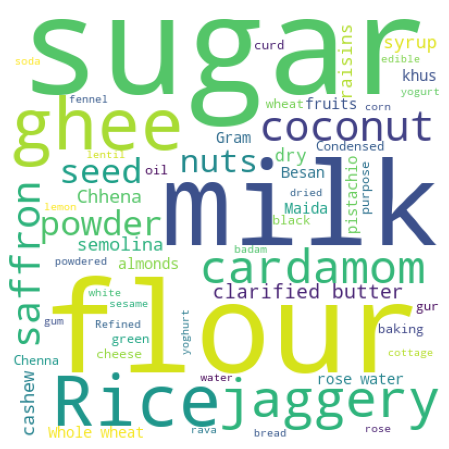

In [ ]:
dessert_df  = food_df[food_df['course']=='dessert'].reset_index()

ingredients = []
for i in range(0,len(dessert_df)):
    text = dessert_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


###### Commonly used ingredients in indian deserts are sugar,ghee,milk,flour

### Q2: What are the common ingredients used in south indian cusine

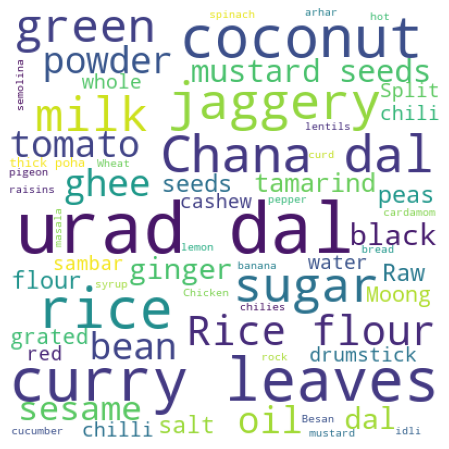

In [ ]:
south_df = food_df[food_df['region']=='South'].reset_index()

ingredients = []
for i in range(0,len(south_df)):
    text = south_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


##### The most commonly used ingredients in south indian cusines are urad dal,curry leaves,coconut,jaggery,rice,flour

### Q3: What are the common ingredients used in north indian cusines

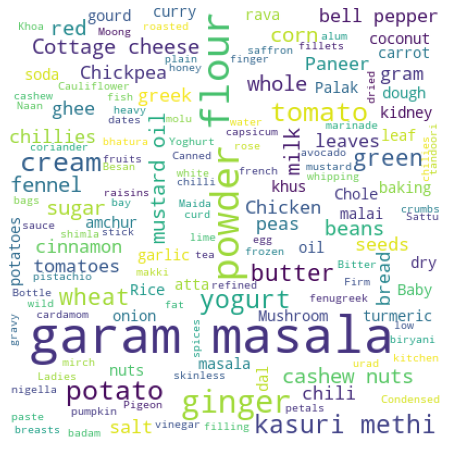

In [ ]:
north_df = food_df[food_df['region']=='North'].reset_index()

ingredients = []
for i in range(0,len(north_df)):
    text = north_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


##### Commonly used ingredients in north indian cusine is garam masala,flour,ginger

#### Q4: List of 10  Indian snacks with shortest cooking time

In [ ]:
snack_df = food_df[food_df['course']=='snack']

short_sort_snack_df = snack_df.sort_values(['cook_time'],ascending=True).iloc[:10,:]

fig = px.bar(short_sort_snack_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()


#### Q5: List of 10  Indian snacks with longest cooking time

In [ ]:
snack_df = food_df[food_df['course']=='snack']

short_sort_snack_df = snack_df.sort_values(['cook_time'],ascending=False).iloc[:10,:]

fig = px.bar(short_sort_snack_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()
